In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [2]:
n1 = 5 # cantidad de ciudades
n2 = 10  # cantidad de viajes
n3 = 5  # distancia máxima
a = 0
distance = np.zeros([n1,n1])
moves = np.zeros([n2, 2])

In [3]:
while (np.linalg.matrix_rank(a)!=n1):
    a = np.random.randint(n3, size=(n1,n1))
    np.fill_diagonal(a,0)
    a = np.tril(a) + np.tril(a, -1).T
print("Matriz de rutas: \n{}".format(a))

Matriz de rutas: 
[[0 3 2 0 2]
 [3 0 0 2 3]
 [2 0 0 1 0]
 [0 2 1 0 4]
 [2 3 0 4 0]]


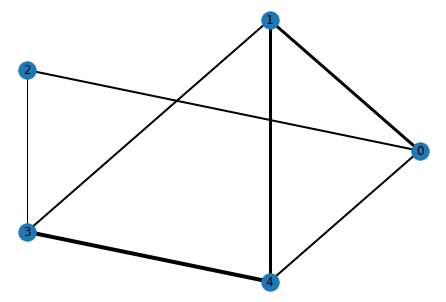

In [4]:
net1 = nx.from_numpy_matrix(copy.deepcopy(a))
net2 = nx.from_numpy_matrix(copy.deepcopy(a))
for e in net2.edges():
    net2[e[0]][e[1]]['color'] = 'black'

edge_weights_list = [net2[e[0]][e[1]]['weight'] for e in net2.edges()]
nx.draw_circular(net2, with_labels=True, width=edge_weights_list)
plt.show()

In [5]:
rng = np.random.default_rng()
for i in range(n2):
    moves[i,:] = rng.choice(n1, size=2, replace=False)
print("Matriz de movimientos: \n{}".format(moves))

Matriz de movimientos: 
[[3. 1.]
 [0. 3.]
 [2. 4.]
 [3. 2.]
 [3. 2.]
 [2. 3.]
 [4. 0.]
 [1. 3.]
 [0. 3.]
 [1. 0.]]


In [6]:
colores = []
for i in range(n2):
    color = np.base_repr(np.random.choice(16777215), base=16)
    colores.append('#{:0>6}'.format(color))

In [7]:
all_edges = [e for e in net1.edges]
caminitos = []
for j in range(n2):
    p = nx.dijkstra_path(net1,int(moves[j,0]),int(moves[j,1]))
    cam = []
    for e in range(len(p)-1):
        cam.append(tuple(sorted((p[e], p[e+1]))))    
    caminitos.append(cam)
    print("{:0>3} - Para llegar desde {} hasta {} hay que hacer el siguiente camino: {}".format(j+1, moves[j,0],moves[j,1], p))

001 - Para llegar desde 3.0 hasta 1.0 hay que hacer el siguiente camino: [3, 1]
002 - Para llegar desde 0.0 hasta 3.0 hay que hacer el siguiente camino: [0, 2, 3]
003 - Para llegar desde 2.0 hasta 4.0 hay que hacer el siguiente camino: [2, 0, 4]
004 - Para llegar desde 3.0 hasta 2.0 hay que hacer el siguiente camino: [3, 2]
005 - Para llegar desde 3.0 hasta 2.0 hay que hacer el siguiente camino: [3, 2]
006 - Para llegar desde 2.0 hasta 3.0 hay que hacer el siguiente camino: [2, 3]
007 - Para llegar desde 4.0 hasta 0.0 hay que hacer el siguiente camino: [4, 0]
008 - Para llegar desde 1.0 hasta 3.0 hay que hacer el siguiente camino: [1, 3]
009 - Para llegar desde 0.0 hasta 3.0 hay que hacer el siguiente camino: [0, 2, 3]
010 - Para llegar desde 1.0 hasta 0.0 hay que hacer el siguiente camino: [1, 0]
